In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import statistics as s

In [18]:
df = sns.load_dataset('tips')

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
#mean
np.mean(df['total_bill'])

19.785942622950824

In [21]:
#median
np.median(df['total_bill'])

17.795

In [22]:
#mode
s.mode(df['total_bill'])

13.42

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

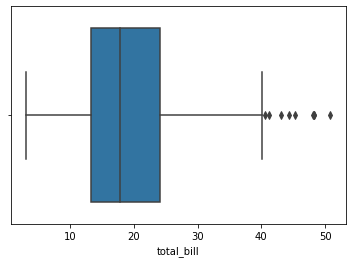

In [23]:
sns.boxplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

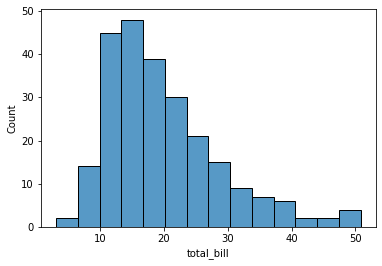

In [24]:
sns.histplot(df['total_bill'])

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

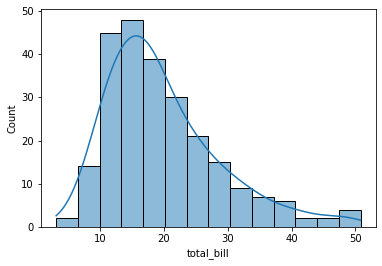

In [25]:
sns.histplot(df['total_bill'],kde=True)

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

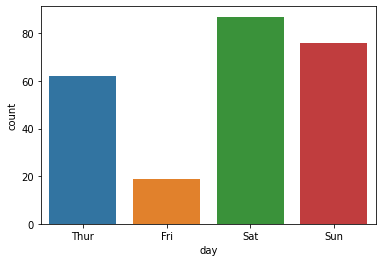

In [26]:
sns.countplot(df['day'])

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

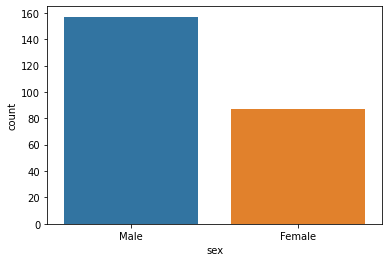

In [27]:
sns.countplot(df['sex'])

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

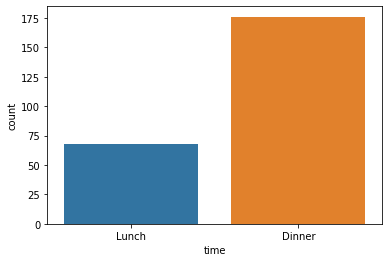

In [28]:
sns.countplot(df['time'])

In [29]:
np.percentile(df['total_bill'],[25,75])

array([13.3475, 24.1275])

In [30]:
IQR = 24.1275-13.3475
IQR

10.780000000000001

In [32]:
df = sns.load_dataset('iris')

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
#mean
np.mean(df['sepal_length'])

5.843333333333335

In [35]:
#Meadian
np.median(df['sepal_length'])

5.8

In [36]:
#mode
s.mode(df['sepal_length'])

5.0

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

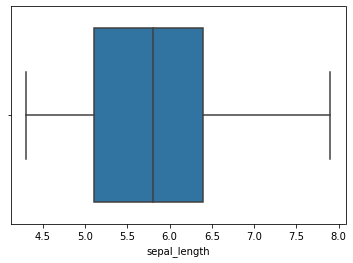

In [37]:
sns.boxplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

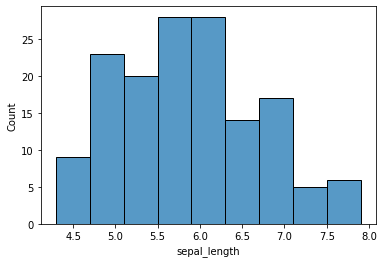

In [38]:
sns.histplot(df['sepal_length'])

<AxesSubplot:xlabel='sepal_length', ylabel='Count'>

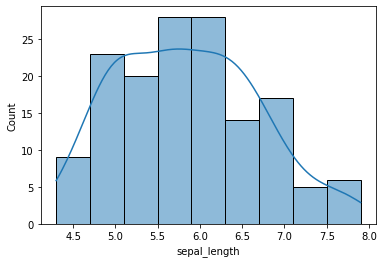

In [39]:
sns.histplot(df['sepal_length'],kde=True)

C:\Users\fazlu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length', ylabel='count'>

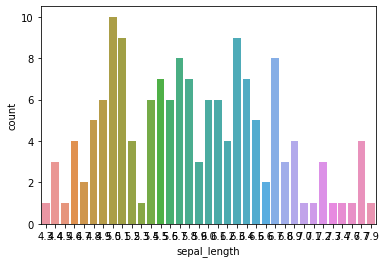

In [40]:
sns.countplot(df['sepal_length'])

In [41]:
np.percentile(df['sepal_length'],[25,75])

array([5.1, 6.4])

In [42]:
IQR = 6.4-5.1
IQR

1.3000000000000007

In [43]:
## Outliers
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

<AxesSubplot:ylabel='Count'>

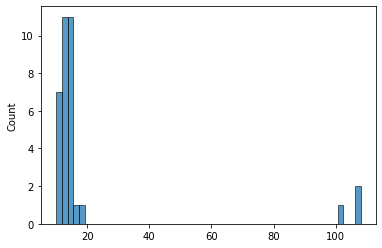

In [46]:
sns.histplot(dataset)

In [47]:
## Z-Score, IQR

outliers = []

def detect_outliers(data):
    threshold = 3 # standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [48]:
detect_outliers(dataset)

[102, 107, 108]

In [49]:
### outliers using IQR
# 1. sort the data
# 2. Calculate Q1 and Q3
# 3. IQR(Q1-Q3)
# 4. Find lowerfence (Q1-1.5(IQR))
# 4. Find upperfence (Q3+1.5(IQR))

In [50]:
dataset = sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [56]:
q1,q3 = np.percentile(dataset,[25,75])

In [59]:
IQR = q3-q1
IQR

3.0

In [60]:
lowerFence = q1-1.5*IQR
lowerFence

7.5

In [61]:
upperFence = q3+1.5*IQR
upperFence

19.5